In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
churn_data = pd.read_csv('C:/Users/91701/Downloads/BankCustomerChurn/Customer-Churn-Records.csv')

In [3]:
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [4]:
churn_data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [5]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
churn_data['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [7]:
churn_data['Complain'].value_counts()

Complain
0    7956
1    2044
Name: count, dtype: int64

<Axes: ylabel='Density'>

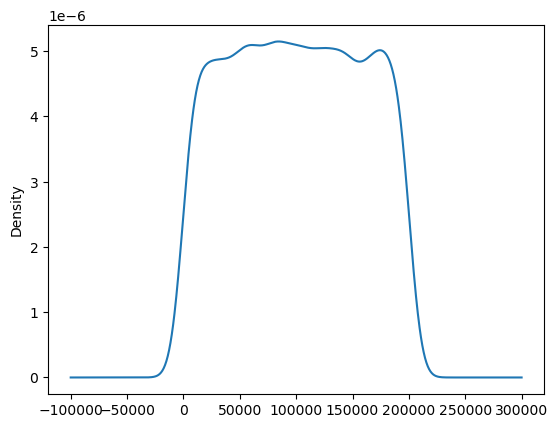

In [8]:
churn_data['EstimatedSalary'].plot.kde()

<Axes: ylabel='Density'>

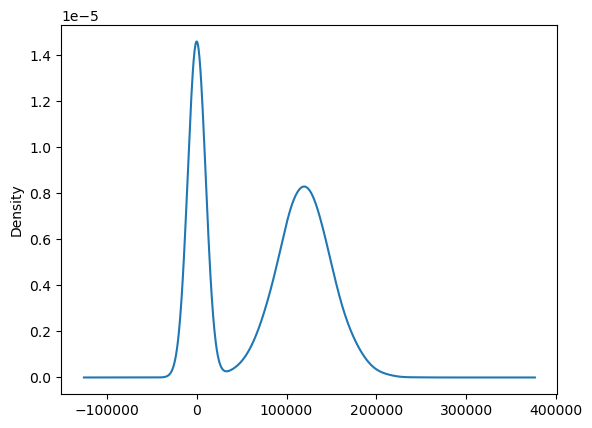

In [9]:
churn_data['Balance'].plot.kde()

In [10]:
def plot_data (df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].plot.kde() # this is the histogram
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

0.7120930889011536


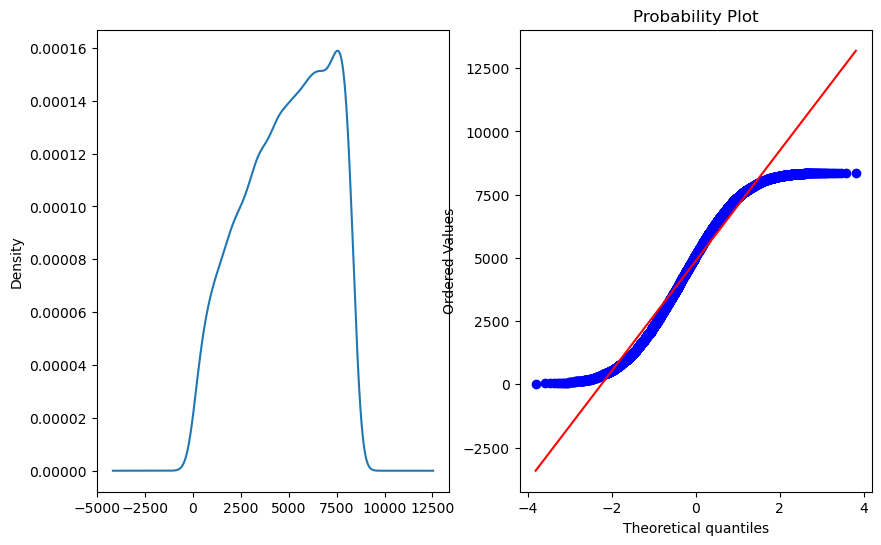

In [11]:
churn_data['Salary_Boxcox'],parameters=stat.boxcox(churn_data['EstimatedSalary'])
print(parameters)
plot_data(churn_data,'Salary_Boxcox')

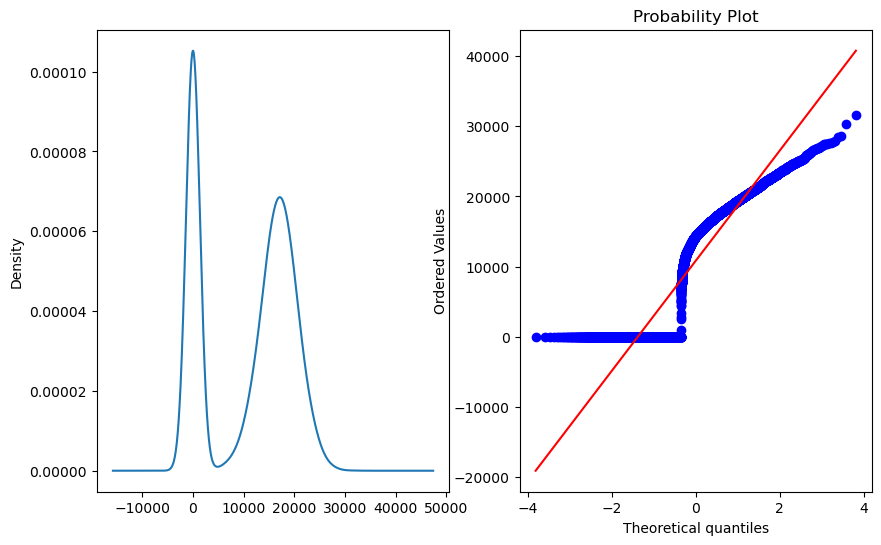

In [12]:
churn_data['Balance_exponential'] =churn_data.Balance**(1/1.2)
plot_data(churn_data, 'Balance_exponential' )

In [13]:
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Salary_Boxcox,Balance_exponential
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,5151.740067,0.000000
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,5550.871862,12668.852877
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,5599.582282,21676.970381
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,4876.376642,0.000000
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,4317.351814,17737.849775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,4966.517646,0.000000
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,5164.438348,9237.793459
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,2754.579145,0.000000
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,4841.597887,11558.840700


<Axes: >

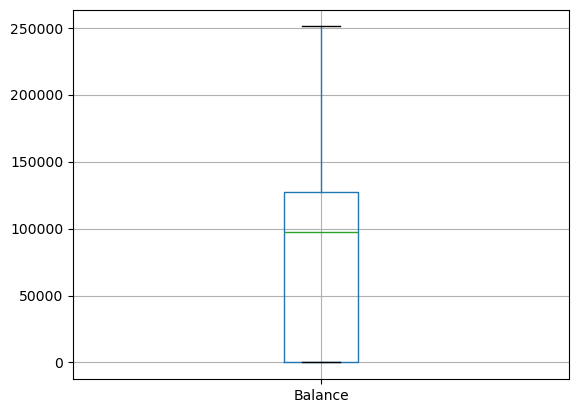

In [14]:
churn_data.boxplot(column='Balance')

<Axes: >

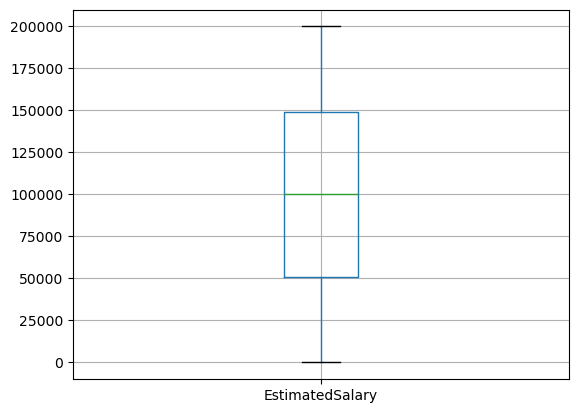

In [15]:
churn_data.boxplot(column='EstimatedSalary')

In [16]:
fig = px.histogram(churn_data, x="Geography", color='Exited', barmode='group',
             height=400)
fig.show()

In [17]:
encoder = LabelEncoder()
churn_data['Geography'] = encoder.fit_transform(churn_data['Geography'])
churn_data['Gender'] = encoder.fit_transform(churn_data['Gender'])
churn_data['Card Type'] = encoder.fit_transform(churn_data['Card Type'])

In [18]:
columns_to_scale = ['Salary_Boxcox', 'Balance_exponential', 'CreditScore', 'Point Earned']
scaler =MinMaxScaler()
churn_data[columns_to_scale] = scaler.fit_transform(churn_data[columns_to_scale])

In [19]:
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Salary_Boxcox,Balance_exponential
0,1,15634602,Hargrave,0.538,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,0.391600,0.615933,0.000000
1,2,15647311,Hill,0.516,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,0.382520,0.663714,0.401011
2,3,15619304,Onio,0.304,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,0.292849,0.669546,0.686147
3,4,15701354,Boni,0.698,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,0.262202,0.582969,0.000000
4,5,15737888,Mitchell,1.000,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,0.347333,0.516047,0.561461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.842,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,0.205448,0.593760,0.000000
9996,9997,15569892,Johnstone,0.332,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,0.740068,0.617454,0.292407
9997,9998,15584532,Liu,0.718,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,0.505108,0.328964,0.000000
9998,9999,15682355,Sabbatini,0.844,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,0.249716,0.578806,0.365875


In [20]:
col_X = ['CreditScore',	'Geography', 'Gender', 'Age', 'Tenure',	'NumOfProducts', 'HasCrCard', 'IsActiveMember',	'Complain', 'Satisfaction Score', 'Card Type',	'Point Earned',	'Salary_Boxcox', 'Balance_exponential']
X=churn_data[col_X]
y=churn_data['Exited']

In [21]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=14)
ordered_feature=ordered_rank_features.fit(X,y)
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank
features_rank.nlargest(14,'Score') 

,Features,Score
8,Complain,7887.606705
3,Age,2299.988991
7,IsActiveMember,118.543911
2,Gender,51.302173
13,Balance_exponential,31.569090
1,Geography,11.701739
5,NumOfProducts,5.011248
4,Tenure,3.111425
10,Card Type,0.984704
0,CreditScore,0.445531


In [22]:
col_X=['Complain', 'Age', 'IsActiveMember', 'Gender', 'Balance_exponential', 'Geography', 'NumOfProducts', 'Tenure']
X=churn_data[col_X]

In [23]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,20,30],
	        'criterion' : ['gini', 'entropy'],
		    'class_weight': [dict({1:0,1:4})]
        }
    },
    'xgb_classifier': {
        'model': xgb.XGBClassifier(base_score=0.5, booster='gbtree',learning_rate=0.01),
        'params' : {
            'n_estimators': [100,200,500],
	        'objective':['reg:linear', 'reg:squarederror', 'reg:logistic', 'binary:logistic'],
            'max_depth':[3,6],
            'scale_pos_weight': [4]
        }
    }, 	
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'class_weight': [dict({1:0,1:4})]	
            
        }
    }
}

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
cv=KFold(n_splits=5,random_state=None,shuffle=False)
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, scoring='roc_auc', return_train_score=False)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)	
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'matrix': confusion_matrix(y_test, y_pred, labels=clf.classes_),
        'report': classification_report(y_test, y_pred)
    })
	
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params','matrix','roc_score'])
df

f:\anaconda2024\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:15:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda2024\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:15:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda2024\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:15:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda2024\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:15:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda2024\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:15:

,model,best_score,best_params,matrix,roc_score
0,random_forest,0.999258,"{'class_weight': {1: 4}, 'criterion': 'entropy...","[[2382, 3], [1, 614]]",NaN
1,xgb_classifier,0.999112,"{'max_depth': 3, 'n_estimators': 500, 'objecti...","[[2382, 3], [1, 614]]",NaN
2,decision_tree,0.994737,"{'class_weight': {1: 4}, 'criterion': 'gini'}","[[2381, 4], [1, 614]]",NaN


In [28]:
df['best_params'][0]

{'class_weight': {1: 4}, 'criterion': 'entropy', 'n_estimators': 30}

random_forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2385
           1       1.00      1.00      1.00       615

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



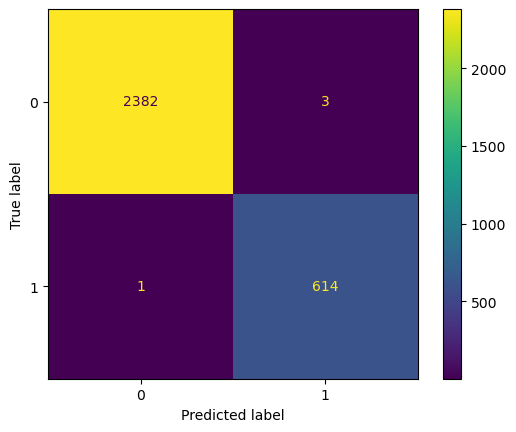

xgb_classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2385
           1       1.00      1.00      1.00       615

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



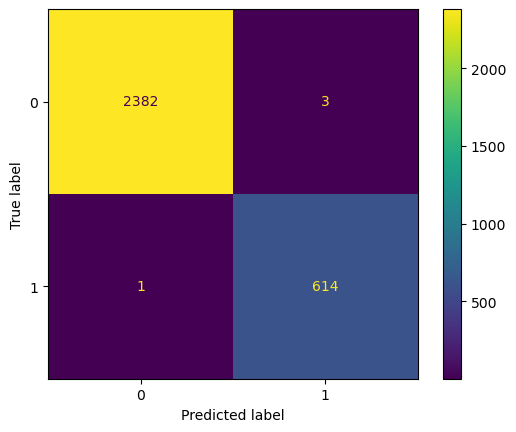

decision_tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2385
           1       0.99      1.00      1.00       615

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



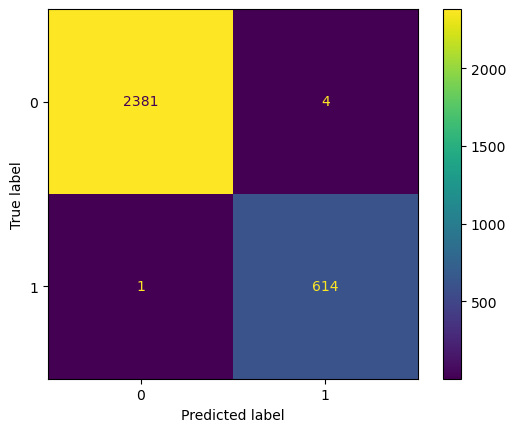

In [29]:
for item in scores:
    print(item['model'])
    print(item['report'])
    disp = ConfusionMatrixDisplay(confusion_matrix=item['matrix'])
    disp.plot()
    plt.show()